### **Load dependencies**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans


#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
# define the dataframe columns
column_names = ['ZIPCODE','POPULATION','ASIAN','PNHW', 'PNHB', 'PNHAI', 'PNHA', 'PNHNH', 'PNHO', 'PNHT',
       'PHISP','AGI'] 

# instantiate the dataframe
montgomery_data= pd.DataFrame(columns=column_names)
montgomery_data

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI


In [3]:
df1 = pd.read_csv('montgomery_zipcode.csv')
df1.columns

Index(['ZIPCODE'], dtype='object')

In [4]:
df1.head()

,ZIPCODE
0,20886
1,20895
2,20896
3,20899
4,20902


In [5]:
df1.shape

(51, 1)

In [6]:
for z in df1['ZIPCODE']:
    montgomery_data = montgomery_data.append({
        'ZIPCODE': str(z),
    }, ignore_index=True)
montgomery_data.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
0,20886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df2 = pd.read_csv('MD_AGI.csv')
df2.columns

Index(['ZIPCODE', 'Total Returns', 'Average_AGI'], dtype='object')

In [8]:
df2.head()

,ZIPCODE,Total Returns,Average_AGI
0,20854,"22,390",252251.0
1,20815,"14,380",239128.0
2,20817,"16,420",229553.0
3,20816,"7,470",227698.0
4,20818,890,179174.0


In [9]:
for i, row in df2.iterrows():
    zc = row['ZIPCODE']
    agi = row['Average_AGI']
    
    loc = montgomery_data.loc[montgomery_data['ZIPCODE'] == str(zc)]
    if loc.shape[0] > 0:
        montgomery_data['AGI'][loc.index[0]] = agi
montgomery_data.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
0,20886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54306
1,20895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119578
2,20896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54719


In [10]:
df3 = pd.read_csv('MD_Census_Data.csv')
df3.columns

Index(['FID', 'ZCTA5CE10', 'FIRST_STAT', 'FIRST_GEOI', 'FIRST_CLAS',
       'FIRST_MTFC', 'FIRST_FUNC', 'ZCTA5N', 'STATE', 'AREALAND', 'AREAWATR',
       'POP100', 'HU100', 'NHW', 'NHB', 'NHAI', 'NHA', 'NHNH', 'NHO', 'NHT',
       'HISP', 'PNHW', 'PNHB', 'PNHAI', 'PNHA', 'PNHNH', 'PNHO', 'PNHT',
       'PHISP', 'POP65_', 'PCTPOP65_', 'MEDAGE', 'VACNS', 'PVACNS', 'PHOWN',
       'PWOMORT', 'PRENT', 'PLT18SP', 'REPORT_2_P', 'REPORT_9_P',
       'Shape_Length', 'Shape_Area'],
      dtype='object')

In [11]:
df3.head()

,FID,ZCTA5CE10,FIRST_STAT,FIRST_GEOI,FIRST_CLAS,FIRST_MTFC,FIRST_FUNC,ZCTA5N,STATE,AREALAND,...,VACNS,PVACNS,PHOWN,PWOMORT,PRENT,PLT18SP,REPORT_2_P,REPORT_9_P,Shape_Length,Shape_Area
0,1,20601,24,2420601,B5,G6350,S,20601,24,115635266,...,376,4.3,71.1,11.2,19.9,30.4,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,89500.303353,1.903175e+08
1,2,20602,24,2420602,B5,G6350,S,20602,24,35830723,...,769,7.9,59.7,9.0,34.4,43.6,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,42220.214377,5.930458e+07
2,3,20603,24,2420603,B5,G6350,S,20603,24,44239637,...,531,5.1,73.8,4.7,22.6,29.9,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,50682.962600,7.295967e+07
3,4,20606,24,2420606,B5,G6350,S,20606,24,7501011,...,15,6.5,49.7,39.3,18.1,31.2,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,41458.263845,1.221117e+07
4,5,20607,24,2420607,B5,G6350,S,20607,24,54357590,...,172,4.9,83.1,10.3,7.4,22.1,http://mdpgis.mdp.state.md.us/Census2010/PDF/0...,http://mdpgis.mdp.state.md.us/census2010/PDF/0...,58903.058735,8.962880e+07


In [12]:
df3=df3[['ZCTA5CE10','POP100','NHA','PNHW', 'PNHB', 'PNHAI', 'PNHA', 'PNHNH', 'PNHO', 'PNHT',
       'PHISP']]
df3.head()

,ZCTA5CE10,POP100,NHA,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP
0,20601,24156,880,40.5,46.1,0.6,3.6,0.0,0.2,3.5,5.3
1,20602,24955,731,33.9,52.3,0.5,2.9,0.1,0.2,4.0,6.1
2,20603,28967,1446,33.2,51.9,0.3,5.0,0.1,0.2,3.8,5.5
3,20606,431,4,87.5,10.4,0.2,0.9,0.0,0.0,0.0,0.9
4,20607,9802,560,22.1,64.5,0.3,5.7,0.0,0.1,2.4,4.9


In [13]:
for i, row in df3.iterrows():
    zc = str(int(row['ZCTA5CE10']))
    pop = row['POP100']
    asia = row['NHA']
    pnhw = row['PNHW']
    pnhb = row['PNHB']
    pnhai = row['PNHAI']
    pnha = row['PNHA']
    pnhnh = row['PNHNH']
    pnho = row['PNHO']
    pnht = row['PNHT']
    phisp= row['PHISP']
    
    loc = montgomery_data.loc[montgomery_data['ZIPCODE'] == zc]

    if loc.shape[0] > 0:
#         print(zc)
        montgomery_data['POPULATION'][loc.index[0]] = pop
        montgomery_data['ASIAN'][loc.index[0]] =asia
        montgomery_data['PNHW'][loc.index[0]]= pnhw
        montgomery_data['PNHB'][loc.index[0]]=pnhb
        montgomery_data['PNHAI'][loc.index[0]]=pnhai
        montgomery_data['PNHA'][loc.index[0]]=pnha
        montgomery_data['PNHNH'][loc.index[0]]=pnhnh
        montgomery_data['PNHO'][loc.index[0]]=pnho
        montgomery_data['PNHT'][loc.index[0]]=pnht
        montgomery_data['PHISP'][loc.index[0]]=phisp
               
montgomery_data.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
0,20886,33282,3601,37.7,23.5,0.2,10.8,0,0.5,2.9,24.4,54306
1,20895,19054,1125,73.7,6.3,0.1,5.9,0,0.4,2.5,11.1,119578
2,20896,906,28,88,1.2,0,3.1,0,0,2.8,5,NaN
3,20899,142,12,30.3,52.8,0,8.5,0,0,2.8,5.6,NaN
4,20902,48841,4909,35.1,17.9,0.2,10.1,0.1,0.5,2.4,33.8,54719


In [14]:
montgomery_data.dropna(subset=['AGI'], inplace=True)

In [15]:
montgomery_data.reset_index(inplace=True,drop=True)
montgomery_data.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
0,20886,33282,3601,37.7,23.5,0.2,10.8,0,0.5,2.9,24.4,54306
1,20895,19054,1125,73.7,6.3,0.1,5.9,0,0.4,2.5,11.1,119578
2,20902,48841,4909,35.1,17.9,0.2,10.1,0.1,0.5,2.4,33.8,54719
3,20901,34832,2717,43.1,23.3,0.1,7.8,0.1,0.4,2.6,22.6,68044
4,20904,54612,7533,26.7,41.6,0.1,13.8,0.1,0.4,2.6,14.8,62405


In [16]:
montgomery_data.shape

(42, 12)

In [17]:
montgomery_data.dtypes

ZIPCODE       object
POPULATION    object
ASIAN         object
PNHW          object
PNHB          object
PNHAI         object
PNHA          object
PNHNH         object
PNHO          object
PNHT          object
PHISP         object
AGI           object
dtype: object

In [18]:
montgomery_data[["POPULATION",'ASIAN','AGI']] = montgomery_data[["POPULATION",'ASIAN','AGI']].astype("int")


In [19]:
montgomery_data[["PNHW", "PNHB",'PNHAI','PNHA','PNHNH','PNHO','PNHT','PHISP']]=montgomery_data[["PNHW", "PNHB",'PNHAI','PNHA','PNHNH','PNHO','PNHT','PHISP']].astype('float')

In [20]:
montgomery_data['POPULATION'] = montgomery_data['POPULATION']/montgomery_data['POPULATION'].max()

In [21]:
montgomery_data['ASIAN'] = montgomery_data['ASIAN']/montgomery_data['ASIAN'].max()

In [22]:
montgomery_data.corr()

,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
POPULATION,1.000000,0.868996,-0.485764,0.298984,-0.291498,0.346048,-0.039951,0.459193,-0.184242,0.434388,-0.165317
ASIAN,0.868996,1.000000,-0.422864,0.162453,-0.252502,0.622273,-0.140338,0.247113,-0.022575,0.241611,-0.121197
PNHW,-0.485764,-0.422864,1.000000,-0.828242,0.155106,-0.534343,-0.039483,-0.598749,-0.079190,-0.778536,0.721610
PNHB,0.298984,0.162453,-0.828242,1.000000,-0.100673,0.212510,0.071655,0.437533,0.225650,0.478008,-0.646099
PNHAI,-0.291498,-0.252502,0.155106,-0.100673,1.000000,-0.266400,-0.135364,-0.187400,0.105994,-0.037619,-0.116854
PNHA,0.346048,0.622273,-0.534343,0.212510,-0.266400,1.000000,-0.019899,0.223653,0.213567,0.131455,-0.165814
PNHNH,-0.039951,-0.140338,-0.039483,0.071655,-0.135364,-0.019899,1.000000,0.172899,0.107065,0.015471,0.037859
PNHO,0.459193,0.247113,-0.598749,0.437533,-0.187400,0.223653,0.172899,1.000000,-0.188559,0.600943,-0.258774
PNHT,-0.184242,-0.022575,-0.079190,0.225650,0.105994,0.213567,0.107065,-0.188559,1.000000,-0.275419,-0.062480
PHISP,0.434388,0.241611,-0.778536,0.478008,-0.037619,0.131455,0.015471,0.600943,-0.275419,1.000000,-0.670748


In [23]:
j=25

In [24]:
a = montgomery_data.sort_values(by ='AGI', ascending = 0) [:j]
a.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
28,20854,0.766833,0.624135,69.0,4.5,0.0,18.2,0.0,0.3,2.4,5.5,252251
13,20815,0.449518,0.124896,80.3,4.3,0.1,6.2,0.0,0.3,2.4,6.3,239128
15,20817,0.560158,0.294378,74.0,3.8,0.1,11.7,0.1,0.3,2.7,7.4,229553
12,20816,0.250526,0.062448,82.8,2.3,0.1,5.6,0.0,0.4,2.3,6.5,227698
14,20818,0.030326,0.011077,80.3,3.7,0.3,8.2,0.1,0.6,2.8,4.2,179174


In [25]:
b = montgomery_data.sort_values(by ='ASIAN', ascending = 0) [:j]
b.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
38,20878,0.965222,1.000000,53.0,9.1,0.1,23.1,0.0,0.2,2.8,11.7,102781
24,20850,0.716273,0.754639,52.8,10.1,0.1,23.5,0.0,0.3,2.8,10.2,104724
35,20874,0.886716,0.636873,40.4,21.8,0.2,16.0,0.0,0.3,3.2,17.9,66715
28,20854,0.766833,0.624135,69.0,4.5,0.0,18.2,0.0,0.3,2.4,5.5,252251
26,20852,0.623918,0.551509,59.1,6.5,0.2,19.7,0.0,0.3,2.4,11.8,101654


In [26]:
c = montgomery_data.sort_values(by ='PNHA', ascending = 0)[:j]
c.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
20,20841,0.161679,0.255677,38.6,13.8,0.1,35.3,0.0,0.2,3.0,9.0,109731
33,20871,0.202949,0.256023,45.1,14.0,0.1,28.2,0.1,0.2,3.1,9.3,98985
24,20850,0.716273,0.754639,52.8,10.1,0.1,23.5,0.0,0.3,2.8,10.2,104724
38,20878,0.965222,1.000000,53.0,9.1,0.1,23.1,0.0,0.2,2.8,11.7,102781
37,20876,0.394089,0.359457,33.5,21.9,0.2,20.4,0.0,0.3,3.4,20.3,65584


In [27]:
d = montgomery_data.sort_values(by ='POPULATION', ascending = 0)[:j]
d.head()

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
6,20906,1.000000,0.518485,32.0,24.4,0.2,11.6,0.0,0.7,2.2,28.9,52808
38,20878,0.965222,1.000000,53.0,9.1,0.1,23.1,0.0,0.2,2.8,11.7,102781
35,20874,0.886716,0.636873,40.4,21.8,0.2,16.0,0.0,0.3,3.2,17.9,66715
4,20904,0.844133,0.521531,26.7,41.6,0.1,13.8,0.1,0.4,2.6,14.8,62405
28,20854,0.766833,0.624135,69.0,4.5,0.0,18.2,0.0,0.3,2.4,5.5,252251


In [28]:
selected_idx = a.index.intersection(b.index).intersection(c.index).intersection(d.index)
selected_df = montgomery_data.loc[selected_idx]
selected_df

,ZIPCODE,POPULATION,ASIAN,PNHW,PNHB,PNHAI,PNHA,PNHNH,PNHO,PNHT,PHISP,AGI
28,20854,0.766833,0.624135,69.0,4.5,0.0,18.2,0.0,0.3,2.4,5.5,252251
15,20817,0.560158,0.294378,74.0,3.8,0.1,11.7,0.1,0.3,2.7,7.4,229553
11,20814,0.427260,0.178067,76.0,4.1,0.1,9.3,0.1,0.3,2.5,7.6,165985
24,20850,0.716273,0.754639,52.8,10.1,0.1,23.5,0.0,0.3,2.8,10.2,104724
38,20878,0.965222,1.000000,53.0,9.1,0.1,23.1,0.0,0.2,2.8,11.7,102781
26,20852,0.623918,0.551509,59.1,6.5,0.2,19.7,0.0,0.3,2.4,11.8,101654
27,20855,0.220956,0.177375,60.6,7.6,0.2,17.9,0.1,0.4,3.0,10.3,101586
17,20832,0.385882,0.189837,66.1,11.3,0.1,11.0,0.0,0.2,2.1,9.1,94798
7,20905,0.278904,0.217668,45.3,22.9,0.2,17.4,0.0,0.3,3.2,10.6,93638


In [29]:
selected_df.shape

(9, 12)

In [30]:
df4 = pd.read_csv('MD_ZIPCODE_NAME_LOC.csv')
print(df4.shape)

(669, 13)


In [31]:
df4.head()

,the_geom,OBJECTID_1,OBJECTID,AREA,PERIMETER,STATEZIP_2,STATEZIP_3,ZIPCODE1,ZIPCODE2,ZIPNAME,Shape_Leng,Shape_area,Shape_len
0,MULTIPOLYGON (((-79.3443788816394 39.657186418...,1,1,0,65617.799321,2,1,21531.0,2.402322e+09,Friendsville,65985.296521,1.712703e+08,65985.296521
1,MULTIPOLYGON (((-77.47019284905247 39.71844165...,24,24,0,3095.687185,25,24,21719.0,2.402122e+09,Cascade,3095.687185,3.675556e+05,3095.687185
2,MULTIPOLYGON (((-76.6490020078736 39.617757533...,25,25,0,41796.823787,26,25,21161.0,2.400521e+09,White Hall,41796.823787,5.888542e+07,41796.823787
3,MULTIPOLYGON (((-76.5221135638148 39.539045814...,73,73,0,18663.880331,74,73,21013.0,2.402521e+09,Baldwin,18663.880331,1.108938e+07,18663.880331
4,MULTIPOLYGON (((-76.48823506556019 39.42093878...,525,525,0,50123.651438,526,525,21236.0,2.400521e+09,Nottingham,50123.651438,2.288024e+07,50414.918816


In [32]:
df4.dropna(inplace=True)
df4.drop_duplicates(subset='ZIPCODE1', inplace=True)
print(df4.shape)
df4.columns

(443, 13)


Index(['the_geom', 'OBJECTID_1', 'OBJECTID', 'AREA', 'PERIMETER', 'STATEZIP_2',
       'STATEZIP_3', 'ZIPCODE1', 'ZIPCODE2', 'ZIPNAME', 'Shape_Leng',
       'Shape_area', 'Shape_len'],
      dtype='object')

In [33]:
column_names = ['ZIPCODE','NEIGHBORHOOD','LATITUDE','LONGITUDE']

selected_montgomery= pd.DataFrame(columns=column_names)
selected_montgomery

,ZIPCODE,NEIGHBORHOOD,LATITUDE,LONGITUDE


In [34]:
for ind in df4.index:
    zipcode = str(int(df4['ZIPCODE1'][ind]))
    if zipcode in selected_df['ZIPCODE'].tolist():
        
        zipname = df4['ZIPNAME'][ind]

        latlan = df4['the_geom'][ind].replace('MULTIPOLYGON (((', '').replace(')))', '').split(',')[0].split(' ')
        lat = float(latlan[1])
        lan = float(latlan[0])

        selected_montgomery=selected_montgomery.append({
            'ZIPCODE': zipcode,
            'NEIGHBORHOOD': zipname,
            'LATITUDE': lat,
            'LONGITUDE': lan
        }, ignore_index=True)

selected_montgomery

,ZIPCODE,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,20855,Derwood,39.174405,-77.108489
1,20832,Olney,39.184028,-77.111894
2,20878,Gaithersburg,39.161125,-77.240420
3,20905,Silver Spring,39.145114,-76.959651
4,20850,Rockville,39.111113,-77.187244
5,20854,Potomac,39.074261,-77.289841
6,20852,Rockville,39.067175,-77.157565
7,20817,Bethesda,39.028170,-77.155508
8,20814,Bethesda,39.031823,-77.093820


In [77]:
address = 'Montgomery, MD'

geolocator = Nominatim(user_agent="md_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Montgomery are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Montgomery are 39.1406267, -77.2075612.


In [79]:
map_selected_montgomery = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for latitude, longitude, zipname, zipcode in zip(selected_montgomery['LATITUDE'],selected_montgomery['LONGITUDE'],selected_montgomery['NEIGHBORHOOD'], selected_montgomery['ZIPCODE']):
    label = '{}, {}'.format(zipcode, zipname)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_selected_montgomery)  
    
map_selected_montgomery

In [38]:
CLIENT_ID = 'WCMRIMWPL042MM5J32VAORYTUCJNCCBTEY3S4A0SIOARFQFF' # your Foursquare ID
CLIENT_SECRET = 'QHQTZXDNQD2ZIICLTRBFR0PUAC52E2HN2WJVXDKDMFWXX0GH' # your Foursquare Secret
VERSION = '20200608' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WCMRIMWPL042MM5J32VAORYTUCJNCCBTEY3S4A0SIOARFQFF
CLIENT_SECRET:QHQTZXDNQD2ZIICLTRBFR0PUAC52E2HN2WJVXDKDMFWXX0GH


In [80]:
selected_montgomery.loc[0, 'ZIPCODE']

'20855'

In [102]:
neighborhood_latitude = selected_montgomery.loc[0, 'LATITUDE'] # neighborhood latitude value
neighborhood_longitude = selected_montgomery.loc[0, 'LONGITUDE'] # neighborhood longitude value

neighborhood_name = selected_montgomery.loc[0, 'ZIPCODE'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 20855 are 39.17440484986722, -77.10848949176552.


In [103]:
LIMIT = 500 # limit of number of venues returned by Foursquare API

radius = 3000 # define radius


# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WCMRIMWPL042MM5J32VAORYTUCJNCCBTEY3S4A0SIOARFQFF&client_secret=QHQTZXDNQD2ZIICLTRBFR0PUAC52E2HN2WJVXDKDMFWXX0GH&v=20200608&ll=39.17440484986722,-77.10848949176552&radius=3000&limit=500'

In [104]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5edeac89660a9f001b4b1498'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 15,
  'suggestedBounds': {'ne': {'lat': 39.20140487686725,
    'lng': -77.07372596636374},
   'sw': {'lat': 39.147404822867195, 'lng': -77.14325301716731}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ba4e90cf964a520ffc138e3',
       'name': 'Blue Mash Golf Course',
       'location': {'address': '5821 Olney Laytonsville Rd',
        'lat': 39.188384997366626,
        'lng': -77.11728602837341,
        'labeledLatLngs': [{'label': 'display',
   

In [105]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [106]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Blue Mash Golf Course,Golf Course,39.188385,-77.117286
1,Agricultural History Farm,Farm,39.163754,-77.131172
2,Field of Screams,Theme Park,39.171910,-77.089906
3,"Johnson's Landscaping Service, Inc.",Construction & Landscaping,39.178993,-77.100928
4,Dog Containment Systems,Construction & Landscaping,39.183042,-77.111554


In [107]:
nearby_venues.shape

(15, 4)

In [108]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

15 venues were returned by Foursquare.


In [109]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=1000, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ZIPCODE', 
                  'LATITUDE', 
                  'LONGITUDE', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [110]:
nearby_venues.head()

,name,categories,lat,lng
0,Blue Mash Golf Course,Golf Course,39.188385,-77.117286
1,Agricultural History Farm,Farm,39.163754,-77.131172
2,Field of Screams,Theme Park,39.171910,-77.089906
3,"Johnson's Landscaping Service, Inc.",Construction & Landscaping,39.178993,-77.100928
4,Dog Containment Systems,Construction & Landscaping,39.183042,-77.111554


In [112]:
selected_montgomery_venues = getNearbyVenues(names=selected_montgomery['ZIPCODE'],
                                  latitudes=selected_montgomery['LATITUDE'],
                                  longitudes=selected_montgomery['LONGITUDE'],
                                  LIMIT=1000)

print('The "selected_montgomery_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(selected_montgomery_venues['Venue Category']),
      len(selected_montgomery_venues['Venue Category'].unique())))

selected_montgomery_venues.to_csv('selected_montgomery_venues.csv', sep=',', encoding='UTF8')
selected_montgomery_venues.head()

      

20855
20832
20878
20905
20850
20854
20852
20817
20814
The "selected_montgomery_venues" dataframe has 544 venues and 158 unique venue types.


,ZIPCODE,LATITUDE,LONGITUDE,Venue,Venue Latitude,Venue Longitude,Venue Category
0,20855,39.174405,-77.108489,Blue Mash Golf Course,39.188385,-77.117286,Golf Course
1,20855,39.174405,-77.108489,Agricultural History Farm,39.163754,-77.131172,Farm
2,20855,39.174405,-77.108489,Field of Screams,39.171910,-77.089906,Theme Park
3,20855,39.174405,-77.108489,"Johnson's Landscaping Service, Inc.",39.178993,-77.100928,Construction & Landscaping
4,20855,39.174405,-77.108489,Dog Containment Systems,39.183042,-77.111554,Construction & Landscaping


In [113]:
selected_montgomery_venues.shape

(544, 7)

In [91]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    # Use geopy library to get the latitude and longitude values 
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Borough_name) 
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    # To verify the number of Boroughs and Neighborhoods in the extracted data
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['Venue'].unique()),
          len(Borough_neighborhoods['ZIPCODE'].unique())))
    
    # create map of city using latitude and longitude values
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

    # add markers to map
    for lat, lng, venue in zip(Borough_neighborhoods['Venue Latitude'], Borough_neighborhoods['Venue Longitude'], Borough_neighborhoods['Venue']):
        label = '{}'.format(venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.4,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  

    return map_Borough

In [92]:
Venues_Map('Montgomery,MD', selected_montgomery_venues)

The geographical coordinates of "Montgomery,MD" are 39.1406267, -77.2075612.
The "Montgomery,MD" dataframe has 443 different venue types and 9 neighborhoods.


In [93]:
selected_montgomery_venues.groupby('Venue Category')['Venue'].count().sort_values(ascending=False)

Venue Category
Mexican Restaurant       20
Park                     20
Coffee Shop              19
American Restaurant      16
Pizza Place              16
                         ..
Portuguese Restaurant     1
Credit Union              1
Gymnastics Gym            1
Restaurant                1
Ramen Restaurant          1
Name: Venue, Length: 158, dtype: int64

In [114]:
print('There are {} uniques categories.'.format(len(selected_montgomery_venues['Venue Category'].unique())))

There are 158 uniques categories.


In [94]:
selected_montgomery_venues.groupby('ZIPCODE')['Venue'].count().sort_values(ascending=False)

ZIPCODE
20878    100
20852    100
20850    100
20817    100
20814    100
20832     16
20855     15
20854      9
20905      4
Name: Venue, dtype: int64

In [54]:
# one hot encoding
selected_montgomery_onehot = pd.get_dummies(selected_montgomery_venues[['Venue Category']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['ZIPCODE'] + list(selected_montgomery_onehot.columns)

# add neighborhood column back to dataframe
selected_montgomery_onehot['ZIPCODE'] = selected_montgomery_venues['ZIPCODE'] 

# move neighborhood column to the first column
selected_montgomery_onehot = selected_montgomery_onehot[column_names]

selected_montgomery_onehot.head()

,ZIPCODE,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,20855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
selected_montgomery_onehot.shape

(544, 159)

In [56]:
selected_montgomery_grouped = selected_montgomery_onehot.groupby('ZIPCODE').mean().reset_index()
selected_montgomery_grouped

,ZIPCODE,Accessories Store,American Restaurant,Antique Shop,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,...,Veterinarian,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,20814,0.000000,0.03,0.01,0.01,0.00,0.01,0.00,0.00,0.01,...,0.00,0.00,0.01,0.01,0.00,0.00,0.02,0.00,0.00,0.01
1,20817,0.000000,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00
2,20832,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,20850,0.010000,0.04,0.00,0.00,0.01,0.04,0.00,0.00,0.00,...,0.01,0.01,0.00,0.02,0.00,0.00,0.02,0.01,0.00,0.00
4,20852,0.000000,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.01
5,20854,0.111111,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,20855,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,20878,0.000000,0.01,0.00,0.00,0.00,0.02,0.01,0.01,0.00,...,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.01,0.00,0.00
8,20905,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [57]:
selected_montgomery_grouped.shape

(9, 159)

In [58]:
num_top_venues =5

for zipcode in selected_montgomery_grouped['ZIPCODE']:
    print("----"+zipcode+"----")
    temp = selected_montgomery_grouped[selected_montgomery_grouped['ZIPCODE'] == zipcode].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----20814----
                venue  freq
0         Coffee Shop  0.06
1         Pizza Place  0.04
2                Park  0.04
3  Mexican Restaurant  0.03
4         Supermarket  0.03


----20817----
                venue  freq
0      Cosmetics Shop  0.05
1         Coffee Shop  0.04
2      Clothing Store  0.04
3  Mexican Restaurant  0.04
4                Park  0.04


----20832----
                        venue  freq
0                        Park  0.19
1                       Trail  0.12
2  Construction & Landscaping  0.12
3                 Golf Course  0.12
4                  Theme Park  0.06


----20850----
                 venue  freq
0       Sandwich Place  0.05
1                Hotel  0.04
2  American Restaurant  0.04
3     Asian Restaurant  0.04
4   Mexican Restaurant  0.04


----20852----
                 venue  freq
0  American Restaurant  0.05
1   Mexican Restaurant  0.05
2          Coffee Shop  0.05
3     Sushi Restaurant  0.04
4         Burger Joint  0.03


----20854----
      

In [59]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZIPCODE']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['ZIPCODE'] = selected_montgomery_grouped['ZIPCODE']

for ind in np.arange(selected_montgomery_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(selected_montgomery_grouped.iloc[ind, :], num_top_venues)

venues_sorted

,ZIPCODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20814,Coffee Shop,Pizza Place,Park,Chinese Restaurant,American Restaurant,Supermarket,Mexican Restaurant,Bakery,Pharmacy,Ice Cream Shop
1,20817,Cosmetics Shop,Park,Clothing Store,Coffee Shop,Mexican Restaurant,American Restaurant,Bank,Juice Bar,Boutique,Pool
2,20832,Park,Trail,Construction & Landscaping,Golf Course,Home Service,Brewery,Farm,Soccer Field,Lawyer,Theme Park
3,20850,Sandwich Place,Hotel,American Restaurant,Asian Restaurant,Mexican Restaurant,Pizza Place,Coffee Shop,Park,Italian Restaurant,Ice Cream Shop
4,20852,Mexican Restaurant,American Restaurant,Coffee Shop,Sushi Restaurant,Thai Restaurant,Peruvian Restaurant,Grocery Store,Bubble Tea Shop,Burger Joint,Chinese Restaurant
5,20854,Trail,Accessories Store,Pizza Place,Chinese Restaurant,Soccer Field,Spa,Restaurant,Grocery Store,Golf Course,Gas Station
6,20855,Park,Trail,Construction & Landscaping,Theme Park,Brewery,Photography Studio,Golf Course,Soccer Field,Outdoors & Recreation,Garden
7,20878,Sandwich Place,Ice Cream Shop,Vietnamese Restaurant,Mexican Restaurant,Donut Shop,Hotel,Pizza Place,Convenience Store,Grocery Store,Bank
8,20905,Garden Center,Basketball Court,Park,Moving Target,Yoga Studio,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Event Space


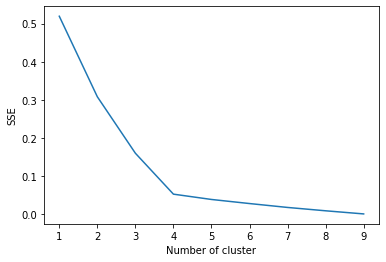

In [74]:
selected_montgomery_grouped_clustering = selected_montgomery_grouped.drop('ZIPCODE', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(selected_montgomery_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [66]:
# set number of clusters
kclusters =4

selected_montgomery_grouped_clustering = selected_montgomery_grouped.drop('ZIPCODE', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(selected_montgomery_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 3, 2, 0, 1], dtype=int32)

In [67]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

selected_montgomery_merged = selected_montgomery

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
selected_montgomery_merged = selected_montgomery_merged.join(venues_sorted.set_index('ZIPCODE'), on='ZIPCODE')

selected_montgomery_merged # check the last columns!


,ZIPCODE,NEIGHBORHOOD,LATITUDE,LONGITUDE,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20855,Derwood,39.174405,-77.108489,2,Park,Trail,Construction & Landscaping,Theme Park,Brewery,Photography Studio,Golf Course,Soccer Field,Outdoors & Recreation,Garden
1,20832,Olney,39.184028,-77.111894,2,Park,Trail,Construction & Landscaping,Golf Course,Home Service,Brewery,Farm,Soccer Field,Lawyer,Theme Park
2,20878,Gaithersburg,39.161125,-77.240420,0,Sandwich Place,Ice Cream Shop,Vietnamese Restaurant,Mexican Restaurant,Donut Shop,Hotel,Pizza Place,Convenience Store,Grocery Store,Bank
3,20905,Silver Spring,39.145114,-76.959651,1,Garden Center,Basketball Court,Park,Moving Target,Yoga Studio,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Event Space
4,20850,Rockville,39.111113,-77.187244,0,Sandwich Place,Hotel,American Restaurant,Asian Restaurant,Mexican Restaurant,Pizza Place,Coffee Shop,Park,Italian Restaurant,Ice Cream Shop
5,20854,Potomac,39.074261,-77.289841,3,Trail,Accessories Store,Pizza Place,Chinese Restaurant,Soccer Field,Spa,Restaurant,Grocery Store,Golf Course,Gas Station
6,20852,Rockville,39.067175,-77.157565,0,Mexican Restaurant,American Restaurant,Coffee Shop,Sushi Restaurant,Thai Restaurant,Peruvian Restaurant,Grocery Store,Bubble Tea Shop,Burger Joint,Chinese Restaurant
7,20817,Bethesda,39.028170,-77.155508,0,Cosmetics Shop,Park,Clothing Store,Coffee Shop,Mexican Restaurant,American Restaurant,Bank,Juice Bar,Boutique,Pool
8,20814,Bethesda,39.031823,-77.093820,0,Coffee Shop,Pizza Place,Park,Chinese Restaurant,American Restaurant,Supermarket,Mexican Restaurant,Bakery,Pharmacy,Ice Cream Shop


In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(selected_montgomery_merged['LATITUDE'], selected_montgomery_merged['LONGITUDE'], selected_montgomery_merged['ZIPCODE'], selected_montgomery_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
selected_montgomery_merged.loc[selected_montgomery_merged['Cluster Labels'] == 0, selected_montgomery_merged.columns[[0] + list(range(5, selected_montgomery_merged.shape[1]))]]

,ZIPCODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,20878,Sandwich Place,Ice Cream Shop,Vietnamese Restaurant,Mexican Restaurant,Donut Shop,Hotel,Pizza Place,Convenience Store,Grocery Store,Bank
4,20850,Sandwich Place,Hotel,American Restaurant,Asian Restaurant,Mexican Restaurant,Pizza Place,Coffee Shop,Park,Italian Restaurant,Ice Cream Shop
6,20852,Mexican Restaurant,American Restaurant,Coffee Shop,Sushi Restaurant,Thai Restaurant,Peruvian Restaurant,Grocery Store,Bubble Tea Shop,Burger Joint,Chinese Restaurant
7,20817,Cosmetics Shop,Park,Clothing Store,Coffee Shop,Mexican Restaurant,American Restaurant,Bank,Juice Bar,Boutique,Pool
8,20814,Coffee Shop,Pizza Place,Park,Chinese Restaurant,American Restaurant,Supermarket,Mexican Restaurant,Bakery,Pharmacy,Ice Cream Shop


In [70]:
selected_montgomery_merged.loc[selected_montgomery_merged['Cluster Labels'] == 1, selected_montgomery_merged.columns[[0] + list(range(5, selected_montgomery_merged.shape[1]))]]

,ZIPCODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,20905,Garden Center,Basketball Court,Park,Moving Target,Yoga Studio,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Farm,Event Space


In [71]:
selected_montgomery_merged.loc[selected_montgomery_merged['Cluster Labels'] == 2, selected_montgomery_merged.columns[[0] + list(range(5, selected_montgomery_merged.shape[1]))]]

,ZIPCODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,20855,Park,Trail,Construction & Landscaping,Theme Park,Brewery,Photography Studio,Golf Course,Soccer Field,Outdoors & Recreation,Garden
1,20832,Park,Trail,Construction & Landscaping,Golf Course,Home Service,Brewery,Farm,Soccer Field,Lawyer,Theme Park


In [72]:
selected_montgomery_merged.loc[selected_montgomery_merged['Cluster Labels'] == 3, selected_montgomery_merged.columns[[0] + list(range(5, selected_montgomery_merged.shape[1]))]]

,ZIPCODE,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,20854,Trail,Accessories Store,Pizza Place,Chinese Restaurant,Soccer Field,Spa,Restaurant,Grocery Store,Golf Course,Gas Station
